In [1]:
from typing import List
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from data_loader import DataLoader
from model import Issue
import config

In [2]:
issues:List[Issue] = DataLoader().get_issues()

Loaded 5573 issues from poetry_issues_all.json.


In [36]:
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

def analyze_issues_by_label(issues):
    """
    Generates:
      1. Monthly issue creation trend per label (stacked bar)
      2. Total issues per label (bar chart)
    """
    # ---------------------------
    # Aggregate monthly counts
    # ---------------------------
    monthly_counts = defaultdict(lambda: Counter())

    for issue in issues:
        if issue.created_date and issue.labels:
            month = issue.created_date.strftime("%Y-%m")
            for label in issue.labels:
                monthly_counts[month][label] += 1

    # Flatten counts
    total_label_counts = Counter()
    for _, label_counts in monthly_counts.items():
        total_label_counts.update(label_counts)

    # Pick top labels (optional: limit to top N)
    top_labels = [l for l, _ in total_label_counts.most_common(6)]

    # Prepare data for plotting
    months = sorted(monthly_counts.keys())
    data = {label: [monthly_counts[m][label] for m in months] for label in top_labels}

    # ---------------------------------------
    # CHART 1: Monthly issue trend per label
    # ---------------------------------------
    fig, ax = plt.subplots(figsize=(10, 5))
    bottom = [0] * len(months)
    colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD']

    for label, color in zip(top_labels, colors):
        ax.bar(months, data[label], bottom=bottom, label=label, color=color, alpha=0.85)
        bottom = [bottom[i] + data[label][i] for i in range(len(months))]

    ax.set_title("Monthly Issue Creation Trend by Label")
    ax.set_xlabel("Month")
    ax.set_ylabel("Number of Issues Created")
    ax.legend(title="Labels")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # ---------------------------------------
    # CHART 2: Total issues per label
    # ---------------------------------------
    #fig, ax = plt.subplots(figsize=(8, 4))
    #labels = list(total_label_counts.keys())
    #counts = list(total_label_counts.values())

    #ax.bar(labels, counts, color='#4C72B0', alpha=0.85)
    #ax.set_title("Total Issues per Label")
    #ax.set_xlabel("Label")
    #ax.set_ylabel("Total Issues")
    #plt.xticks(rotation=45, ha='right')
    #plt.tight_layout()
    #plt.show()


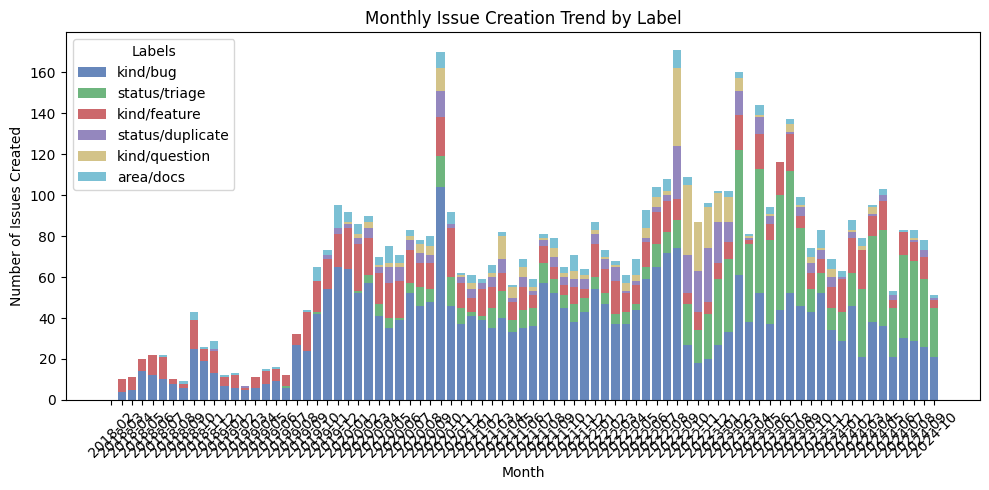

In [37]:
analyze_issues_by_label(issues)

In [16]:
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

def plot_monthly_issue_trend_by_label(issues, year: int):
    """
    Plots a stacked bar chart showing monthly issue creation trend by label for a given year.

    Args:
        issues (List[Issue]): List of Issue objects.
        year (int): Year to filter issues (e.g., 2024).

    Behavior:
        - Filters issues by created_date year.
        - Groups by month and label.
        - Creates stacked bar chart.
        - If no issues found for that year, prints a message and exits.
    """

    # ---------------------------
    # Filter issues by the given year
    # ---------------------------
    filtered_issues = [
        issue for issue in issues
        if issue.created_date and issue.created_date.year == year and issue.labels
    ]

    if not filtered_issues:
        print(f"⚠️ No issue data found for the year {year}.")
        return

    # ---------------------------
    # Aggregate monthly counts
    # ---------------------------
    monthly_counts = defaultdict(lambda: Counter())

    for issue in filtered_issues:
        month = issue.created_date.strftime("%Y-%m")
        for label in issue.labels:
            monthly_counts[month][label] += 1

    # ---------------------------
    # Aggregate top labels
    # ---------------------------
    total_label_counts = Counter()
    for _, label_counts in monthly_counts.items():
        total_label_counts.update(label_counts)

    top_labels = [l for l, _ in total_label_counts.most_common(6)]

    months = sorted(monthly_counts.keys())
    data = {label: [monthly_counts[m][label] for m in months] for label in top_labels}

    # ---------------------------
    # Plot stacked bar chart
    # ---------------------------
    fig, ax = plt.subplots(figsize=(10, 5))
    bottom = [0] * len(months)
    colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD']

    for label, color in zip(top_labels, colors):
        ax.bar(months, data[label], bottom=bottom, label=label, color=color, alpha=0.85)
        bottom = [bottom[i] + data[label][i] for i in range(len(months))]

    ax.set_title(f"Monthly Issue Creation Trend by Label ({year})")
    ax.set_xlabel("Month")
    ax.set_ylabel("Number of Issues Created")
    ax.legend(title="Labels")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


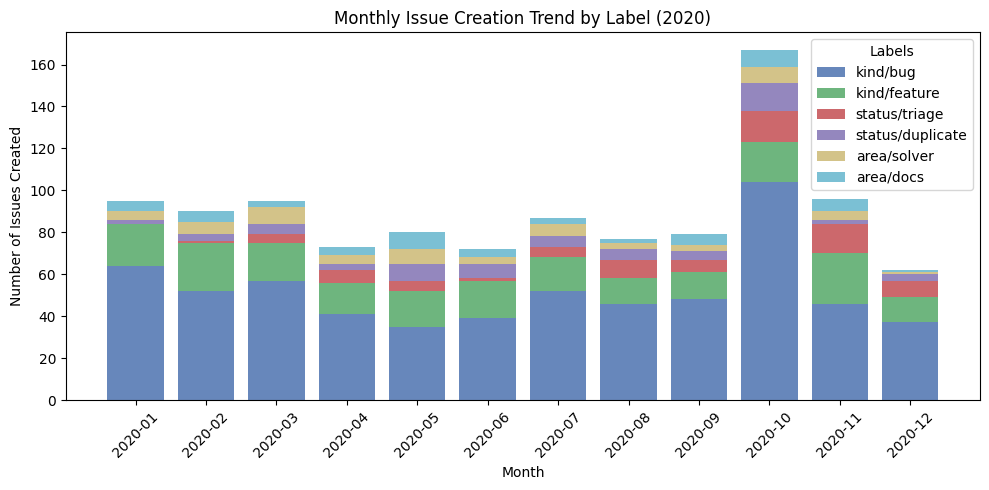

In [46]:
plot_monthly_issue_trend_by_label(issues, 202)
#change year as per the ask.

In [24]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_total_issues_per_label(issues, top_n=10):
    """
    Plots a bar chart of total issues per label category.
    Aggregates by top-level label (e.g., 'area/docs' -> 'area').
    """

    label_counts = Counter()

    for issue in issues:
        if issue.labels:
            for label in issue.labels:
                main_label = label.split('/')[0] if '/' in label else label
                label_counts[main_label] += 1

    if not label_counts:
        print("⚠️ No labels found in issues.")
        return

    top_labels = dict(label_counts.most_common(top_n))

    plt.figure(figsize=(8, 4))
    plt.bar(top_labels.keys(), top_labels.values(), color='#4C72B0', alpha=0.85)
    plt.title("Total Issues per Label Category")
    plt.xlabel("Label Category")
    plt.ylabel("Total Issues")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


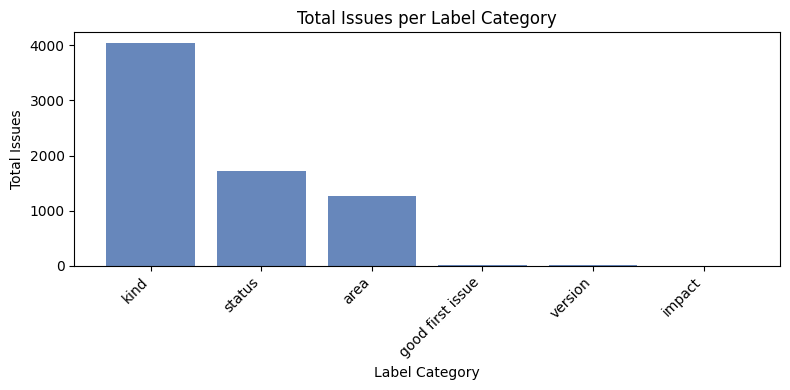

In [25]:
plot_total_issues_per_label(issues)

In [29]:
import matplotlib.pyplot as plt
from collections import Counter

def plot_sub_labels(issues, label_prefix: str):
    """
    Plots a bar chart showing the total issues for all labels that match a given prefix.

    Example:
        plot_sub_labels(issues, "area")  -> shows area/docs, area/tests, etc.
        plot_sub_labels(issues, "good first issue") -> shows only that label.

    Args:
        issues (List[Issue]): List of Issue objects
        label_prefix (str): Label prefix or exact label (e.g. 'area', 'type', 'good first issue')
    """

    label_counts = Counter()

    for issue in issues:
        if issue.labels:
            for label in issue.labels:
                # if it's a prefix type (e.g. "area") match "area/"
                if label.startswith(f"{label_prefix}/"):
                    label_counts[label] += 1
                # if it's an exact label (like "good first issue")
                elif label.lower() == label_prefix.lower():
                    label_counts[label] += 1

    if not label_counts:
        print(f"⚠️ No data found for label prefix '{label_prefix}'.")
        return

    # Sort by count descending
    sorted_counts = dict(label_counts.most_common())

    # Plot
    plt.figure(figsize=(10, 5))
    plt.barh(list(sorted_counts.keys()), list(sorted_counts.values()), color="#4C72B0", alpha=0.9)
    plt.title(f"Issue Distribution for '{label_prefix}' Labels")
    plt.xlabel("Number of Issues")
    plt.ylabel("Label")
    plt.gca().invert_yaxis()  # highest on top
    plt.tight_layout()
    plt.show()


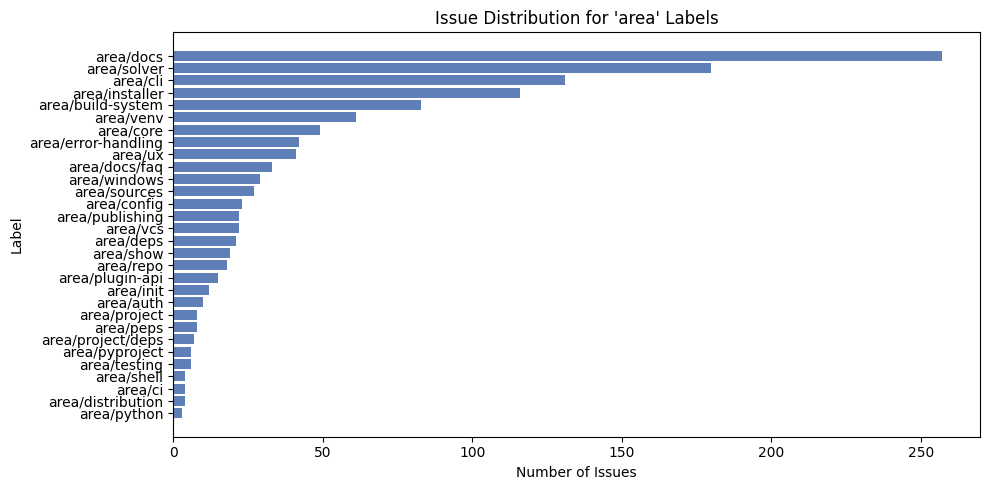

In [45]:
plot_sub_labels(issues, "area")

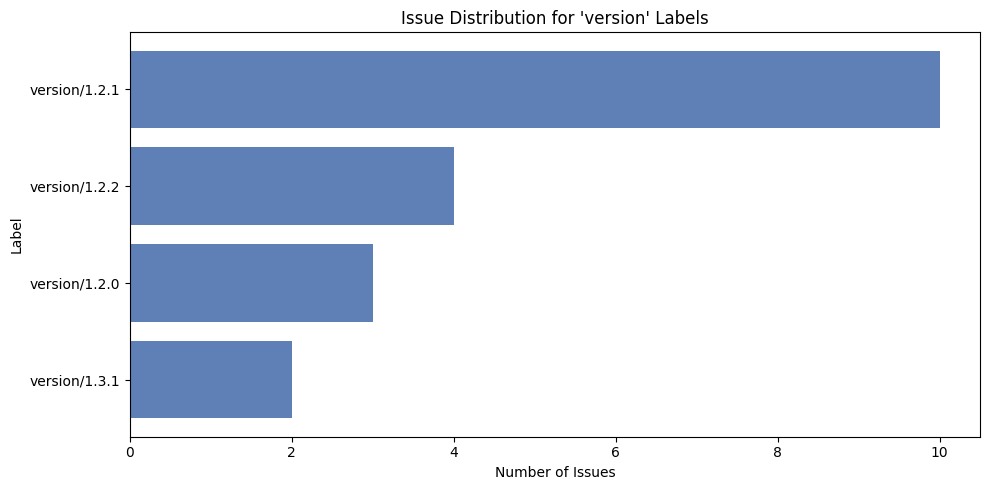

In [41]:
plot_sub_labels(issues, "version")

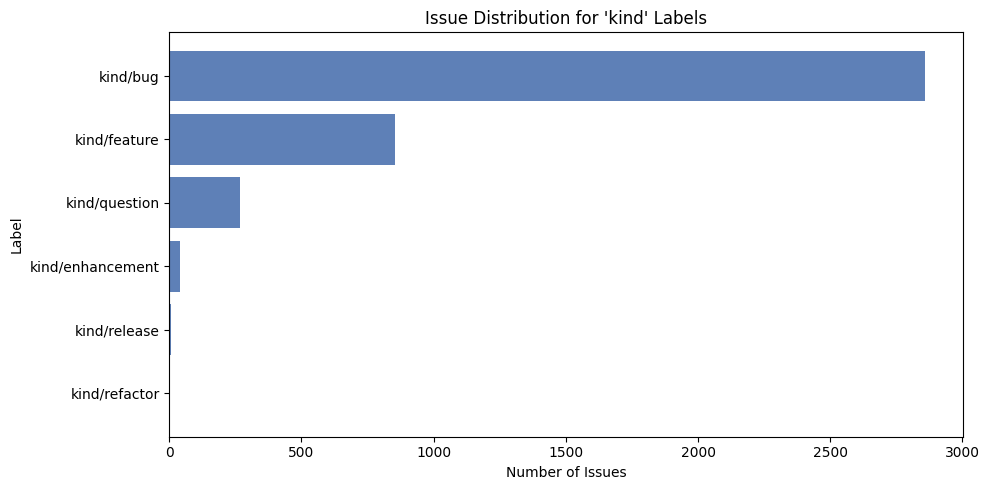

In [34]:
plot_sub_labels(issues, "kind")

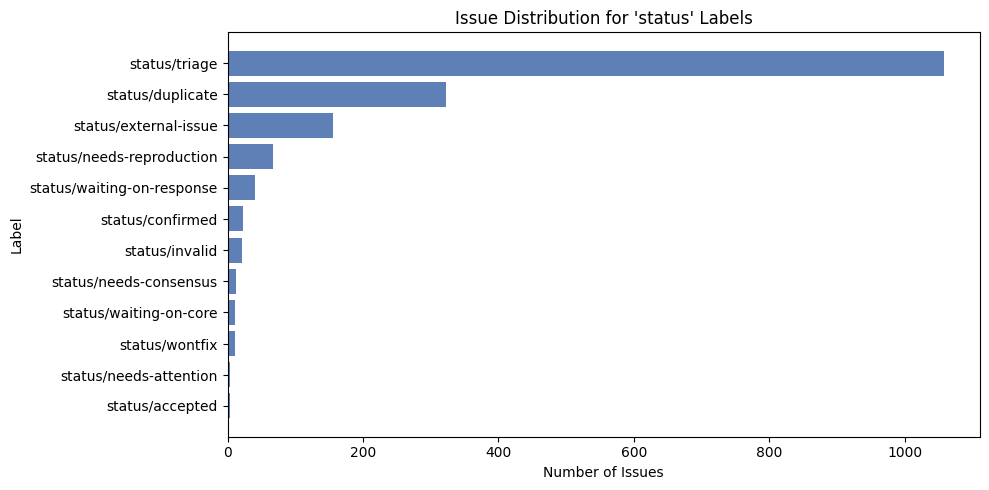

In [35]:
plot_sub_labels(issues, "status")

In [47]:
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

def plot_monthly_issue_trend_by_label_v2(issues, year: int):
    """
    Plots a stacked bar chart showing monthly issue creation trend by label for a given year.

    Args:
        issues (List[Issue]): List of Issue objects.
        year (int): Year to filter issues (e.g., 2024).

    Behavior:
        - Filters issues by created_date year.
        - Groups by month and label.
        - Creates stacked bar chart.
        - If no issues found for that year, prints a message and exits.
    """

    # ---------------------------
    # Filter issues by the given year
    # ---------------------------
    filtered_issues = [
        issue for issue in issues
    ]

    if not filtered_issues:
        print(f"⚠️ No issue data found for the year {year}.")
        return

    # ---------------------------
    # Aggregate monthly counts
    # ---------------------------
    monthly_counts = defaultdict(lambda: Counter())

    for issue in filtered_issues:
        month = issue.created_date.strftime("%Y-%m")
        for label in issue.labels:
            monthly_counts[month][label] += 1

    # ---------------------------
    # Aggregate top labels
    # ---------------------------
    total_label_counts = Counter()
    for _, label_counts in monthly_counts.items():
        total_label_counts.update(label_counts)

    top_labels = [l for l, _ in total_label_counts.most_common(6)]

    months = sorted(monthly_counts.keys())
    data = {label: [monthly_counts[m][label] for m in months] for label in top_labels}

    # ---------------------------
    # Plot stacked bar chart
    # ---------------------------
    fig, ax = plt.subplots(figsize=(10, 5))
    bottom = [0] * len(months)
    colors = ['#4C72B0', '#55A868', '#C44E52', '#8172B3', '#CCB974', '#64B5CD']

    for label, color in zip(top_labels, colors):
        ax.bar(months, data[label], bottom=bottom, label=label, color=color, alpha=0.85)
        bottom = [bottom[i] + data[label][i] for i in range(len(months))]

    ax.set_title(f"Monthly Issue Creation Trend by Label ({year})")
    ax.set_xlabel("Month")
    ax.set_ylabel("Number of Issues Created")
    ax.legend(title="Labels")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


C:\Users\simra\projects_softengg\project-application-template-group-5\project5\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


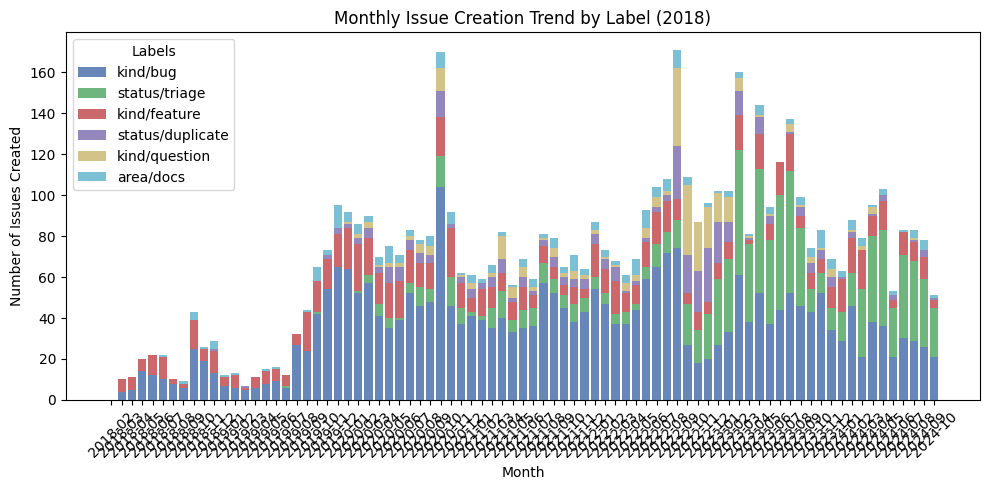

In [48]:
plot_monthly_issue_trend_by_label_v2(issues, 2018)